In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import StandardScaler

In [3]:
train=pd.read_excel('ANZ synthesised transaction dataset.xlsx')

In [4]:
train.isnull().any()

status               False
card_present_flag     True
bpay_biller_code      True
account              False
currency             False
long_lat             False
txn_description      False
merchant_id           True
merchant_code         True
first_name           False
balance              False
date                 False
gender               False
age                  False
merchant_suburb       True
merchant_state        True
extraction           False
amount               False
transaction_id       False
country              False
customer_id          False
merchant_long_lat     True
movement             False
dtype: bool

In [5]:
gend=[]
for i in train['gender']:
    if i=='M':
        gend.append(1) #male
    else:
        gend.append(0)#female
train['gender']=gend

In [6]:
df_salaries = train[train["txn_description"]=="PAY/SALARY"].groupby("customer_id").mean()
df_salaries.head() #amount is the annual salary

,card_present_flag,merchant_code,balance,gender,age,amount
customer_id,,,,,,
CUS-1005756958,NaN,0.0,4718.665385,0,53,970.47
CUS-1117979751,NaN,0.0,11957.202857,1,21,3578.65
CUS-1140341822,NaN,0.0,5841.720000,1,28,1916.51
CUS-1147642491,NaN,0.0,8813.467692,0,34,1711.39
CUS-1196156254,NaN,0.0,23845.717143,0,34,3903.73


In [10]:
salary=[]
for i in train['customer_id']:
    salary.append(round(df_salaries.loc[i]['amount']))
train["annual_salary"] = salary  

In [11]:
df_cust= train.groupby("customer_id").mean()
df_cust.head()

,card_present_flag,merchant_code,balance,gender,age,amount,annual_salary
customer_id,,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,0,53,222.862603,970.0
CUS-1117979751,0.826923,0.0,9829.929000,1,21,339.843700,3579.0
CUS-1140341822,0.815385,0.0,5699.212250,1,28,212.632500,1917.0
CUS-1147642491,0.750000,0.0,9032.841186,0,34,245.600169,1711.0
CUS-1196156254,0.785276,0.0,22272.433755,0,34,147.145796,3904.0


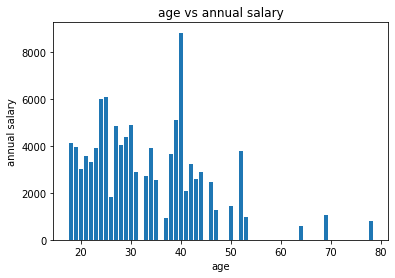

In [19]:
plt.bar(df_cus['age'],df_cus['annual_salary'])
plt.title("age vs annual salary")
plt.xlabel("age")
plt.ylabel("annual salary")
plt.show()

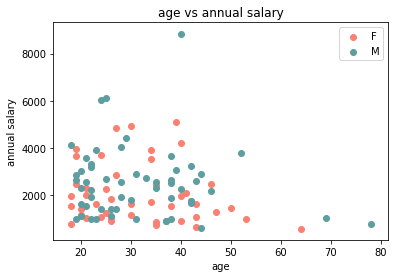

In [24]:
plt.scatter(df_cust[df_cust['gender']==0]['age'],df_cust[df_cust['gender']==0]['annual_salary'],c='salmon',label='F')
plt.scatter(df_cust[df_cust['gender']==1]['age'],df_cust[df_cust['gender']==1]['annual_salary'],c='cadetblue',label='M')
plt.title("age vs annual salary")
plt.xlabel("age")
plt.ylabel("annual salary")
plt.legend()
plt.show()

In [37]:
spending=[]
for i in x.index:
    d=train[train['customer_id']==i]
    s=d[d['txn_description']=='SALES-POS']['amount'].sum()+d[d['txn_description']=='POS']['amount'].sum()
    spending.append(s)
df_cust['spending']=spending

In [38]:
x=df_cust.drop('annual_salary',1)
y=df_cust['annual_salary']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [39]:
lr = LinearRegression()

In [40]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [41]:
lr.score(xtest,ytest) #linear regression score

0.17648268858195015

In [42]:
pred=lr.predict(xtest)

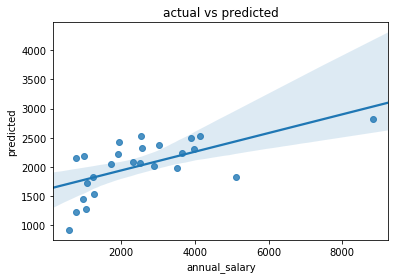

In [44]:
import seaborn as sns
sns.regplot(ytest,pred)
plt.title("actual vs predicted")
plt.ylabel("predicted")
plt.show()

In [82]:
train[train['customer_id']=='CUS-1005756958'][['extraction','txn_description','amount']]

,extraction,txn_description,amount
163,2018-08-02T08:08:02.000+0000,POS,6.48
272,2018-08-02T21:36:42.000+0000,SALES-POS,39.95
315,2018-08-03T08:27:40.000+0000,POS,22.96
320,2018-08-03T09:15:59.000+0000,POS,9.11
435,2018-08-03T21:51:32.000+0000,SALES-POS,14.65
...,...,...,...
10713,2018-10-21T15:00:00.000+0000,PAYMENT,156.00
10951,2018-10-23T16:00:00.000+0000,PAY/SALARY,970.47
11142,2018-10-25T04:00:00.000+0000,PHONE BANK,182.00
11650,2018-10-28T17:00:00.000+0000,PAYMENT,128.00


In [56]:
df = train[["txn_description", "gender", "age", "merchant_state", "movement"]]

In [57]:
x=pd.get_dummies(df)
y=train['annual_salary']

In [58]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=2)

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtc = DecisionTreeClassifier()

In [75]:
dtc.fit(xtrain,ytrain)
dtc.score(xtest,ytest)

0.7738292925938226

In [62]:
pred=dtc.predict(xtest)

In [116]:
df=pd.DataFrame({"actual":ytest,"predicted":pred})

In [128]:
df=df.reset_index()

In [118]:
df['bias']=df['actual']-df['predicted']

In [130]:
x=df['bias']

In [129]:
df.head()

,index,actual,predicted,bias
0,10634,1099.0,1099.0,0.0
1,1244,2309.0,2545.0,-236.0
2,3600,2647.0,1881.0,766.0
3,9195,2545.0,2545.0,0.0
4,4064,3977.0,3977.0,0.0


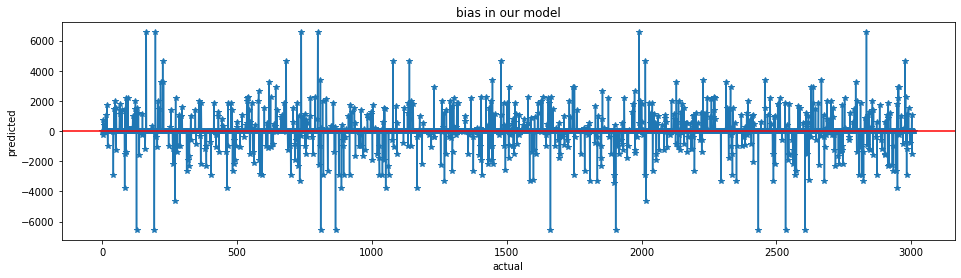

In [142]:
plt.figure(figsize=(16,4))
plt.plot(x,marker='*')
plt.axhline(y=0, color='r', linestyle='-')
plt.title("bias in our model")
plt.xlabel("actual")
plt.ylabel("predicted")
plt.show()

## conclusion:
linear regression model:
* the accuracy of this model was 17% which is very low Hence, this Linear Regression model has performed very poorly in predicting the average salary of an ANZ customer.

decision tree model:
* The Decision Tree model achieved an accuracy of 0.77 .It indicates that the model is able to explain of the variability of the annual salary.

decision tree model performed better than linear regression model but both of these models are not recommendable of customer segmentation. Adding more variable can help achieve better score.

written by : shaili patel

date : 27/08/2020